## CREANDO GRÁFICOS CON MATLPLOTLIB

In [14]:
import matplotlib.pyplot as plt
import gen_functions as gf
import numpy as np
import math

In [13]:
# Creando una función para definir la amplitud de la función Seno
x = np.arange(0, 0.000000832, 0.000000001)
len(x)

832

### Graficando la señal generada

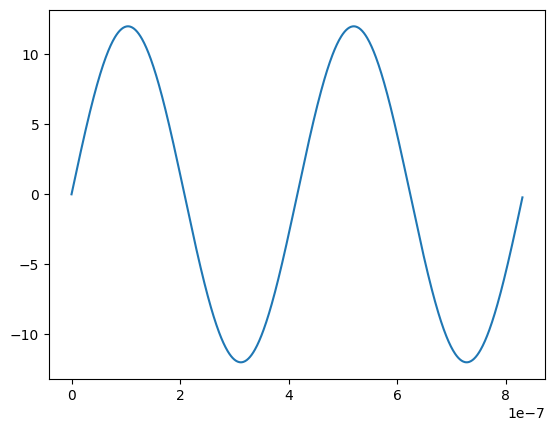

In [19]:
y = gf.generate_sin(12, 15.1*10**6, x)
plt.plot(x, y)
plt.show()
# Guardar una imagen
# plt.savefig("cuadratica.jpg")
# plt.close()

### Cuantizando la señal generada
    1. Generar los bits de trabajo
    2. Crear el rango de valores para la asignación

### 1. Definiendo la cantidad de bits de trabajo

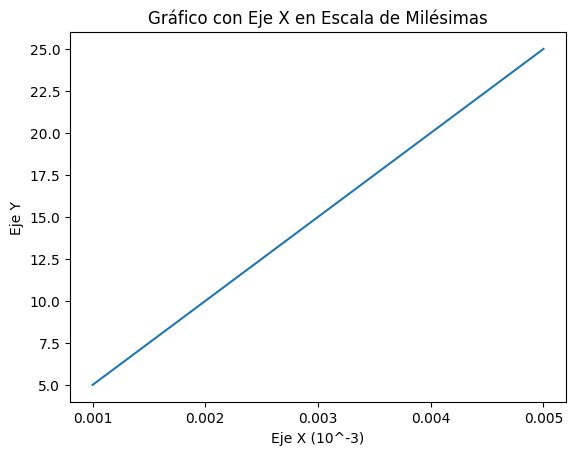

In [5]:
# Datos de ejemplo
x = [0.001, 0.002, 0.003, 0.004, 0.005]
y = [5, 10, 15, 20, 25]

plt.plot(x, y)
plt.xlabel("Eje X (10^-3)")
plt.ylabel("Eje Y")
plt.title("Gráfico con Eje X en Escala de Milésimas")
plt.xticks(x, [str(val) for val in x])  # Cambiar las etiquetas del eje x

plt.show()

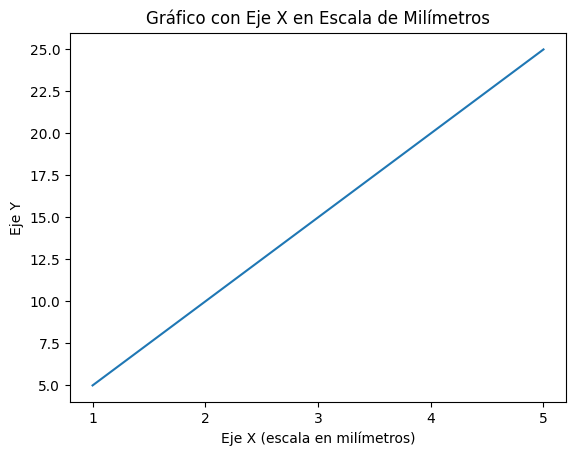

In [6]:
# Datos de ejemplo
x = [1, 2, 3, 4, 5]  # Valores en la escala que deseas mostrar (1, 2, ...)
x_scaled = [val * 0.001 for val in x]  # Valores ajustados para la escala en milésimas
y = [5, 10, 15, 20, 25]

plt.plot(x_scaled, y)
plt.xlabel("Eje X (escala en milímetros)")
plt.ylabel("Eje Y")
plt.title("Gráfico con Eje X en Escala de Milímetros")
plt.xticks(x_scaled, x)  # Cambiar las etiquetas del eje x a los valores originales

plt.show()


In [7]:
# Crear una matriz
matriz = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
matriz1 = np.linspace(0, 10, 5)
matriz_sin = 10*np.sin(matriz1*2.1)
# Escalar por el cual multiplicar la matriz
escalar = 2.3123

# Multiplicar la matriz por el escalar
matriz_resultante = matriz * escalar
matriz2 = matriz1*escalar
print(matriz_sin/10)
print(matriz_sin)
print(escalar*matriz_sin)


print(matriz2)
print(matriz_resultante)

[ 0.         -0.85893449 -0.87969576 -0.04202435  0.83665564]
[ 0.         -8.58934493 -8.7969576  -0.42024353  8.36655639]
[  0.         -19.86114229 -20.34120506  -0.97172911  19.34598833]
[ 0.       5.78075 11.5615  17.34225 23.123  ]
[[ 2.3123  4.6246  6.9369]
 [ 9.2492 11.5615 13.8738]
 [16.1861 18.4984 20.8107]]
